#Algoritmos de machine learning para classificação: Projeto 1

In [89]:
# features/caracteristicas (1 sim, 0 nao)
# pelo longo?
# perna curta
# faz auau?
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

# 1 => porco, 0 => cachorro
treino_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1, 1, 1, 0, 0, 0] # labels

In [90]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC()

In [91]:
animal_misterioso = [1, 1, 1] # cachorro
model.predict([animal_misterioso])

array([0])

In [92]:
misterio1 = [1, 1, 1] # cachorro
misterio2 = [1, 1, 0] # porco
misterio3 = [0, 1, 1] # porco

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0, 1, 1]


In [93]:
previsoes = model.predict(teste_x)

In [94]:
previsoes

array([0, 1, 0])

In [95]:
teste_y

[0, 1, 1]

In [96]:
previsoes == teste_y

array([ True,  True, False])

In [97]:
corretos = (previsoes == teste_y).sum()
corretos

2

In [98]:
total = len(teste_x)

In [99]:
# TAXA DE ACERTO
taxa_de_acerto = corretos / total
print(f"Taxa de acerto: {taxa_de_acerto * 100:.2f}")

Taxa de acerto: 66.67


In [100]:
from sklearn.metrics import accuracy_score 

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print(f"Taxa de acerto: {taxa_de_acerto * 100:.2f}")

Taxa de acerto: 66.67


#Algoritmos de machine learning para classificação: Projeto 2

In [101]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [102]:
# Renomeando as colunas
mapa = {
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought" : "comprou"
}
dados = dados.rename(columns=mapa)

In [103]:
dados.head()

,principal,como_funciona,contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [104]:
x = dados[["principal", "como_funciona", "contato"]]
x.head()

,principal,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [105]:
y = dados["comprou"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [106]:
dados.shape

(99, 4)

In [107]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

Treinaremos com 75 elementos e testaremos com 24 elementos


In [108]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acuracia foi de {acuracia:.2f}%")

A acuracia foi de 95.83%


## Usando a biblioteca para separar treino e teste

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# tira a aleatoridade do treino e do teste
SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=SEED,  test_size = 0.25)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi {acuracia:.2f}%")

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%


In [110]:
treino_y.value_counts()

0    47
1    27
Name: comprou, dtype: int64

In [111]:
teste_y.value_counts()

0    19
1     6
Name: comprou, dtype: int64

In [112]:
# labels treino e teste não estao proporcionais de acordo com as classes/ O algoritmo so sabe que as pessoas não compram
# Deve se seguir uma proporção para o aprendizado

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# tira a aleatoridade do treino e do teste
SEED = 20
# stratify = y => separar proporcionalmente de acordo com y
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state=SEED,  test_size = 0.25,
                                                        stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi {acuracia:.2f}%")

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%


In [114]:
treino_y.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [115]:
teste_y.value_counts()

0    17
1     8
Name: comprou, dtype: int64

In [116]:
# a proporcção esta proxima de 2 para 1

#Algoritmos de machine learning para classificação: Projeto 3

In [117]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [118]:
# Renomeando as colunas
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preço',
    'unfinished' : 'não_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,não_finalizado,horas_esperadas,preço
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [119]:
troca = {
    0 : 1,
    1 : 0
} # swap values / swap = troca
dados['finalizado'] = dados.não_finalizado.map(troca)
dados.head()

,não_finalizado,horas_esperadas,preço,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [120]:
dados.tail() #tail = rabo

,não_finalizado,horas_esperadas,preço,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


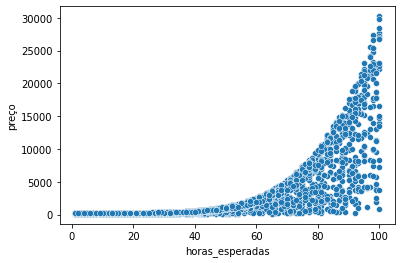

In [121]:
import seaborn as sns

sns.scatterplot(x = "horas_esperadas", y = "preço", data = dados)

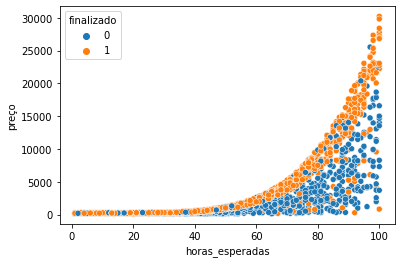

In [122]:
# vizualizar os projetos finalizados
sns.scatterplot(x = "horas_esperadas", y = "preço", hue = "finalizado", data = dados)

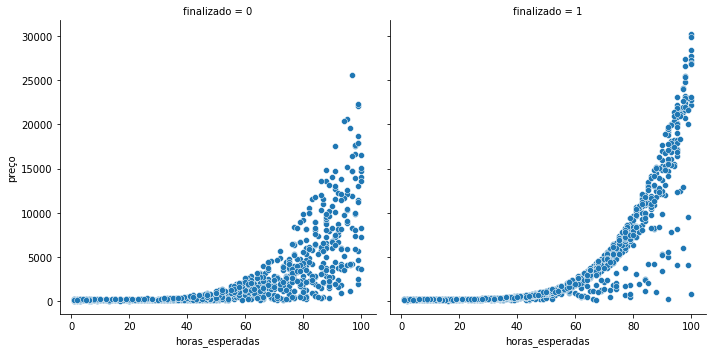

In [123]:
sns.relplot(x = "horas_esperadas", y = "preço", col = "finalizado", data = dados)

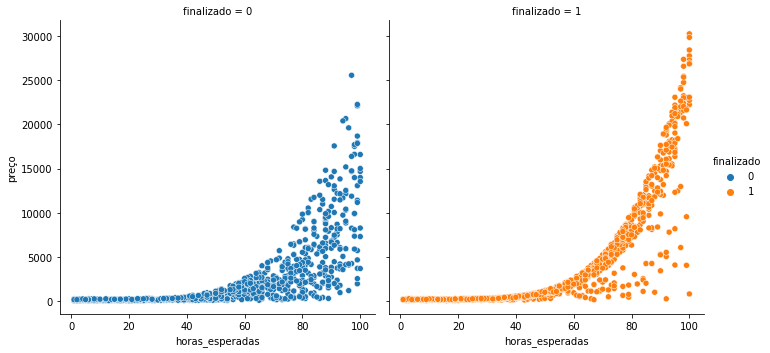

In [124]:
sns.relplot(x = "horas_esperadas", y = "preço", hue = "finalizado", col = "finalizado", data = dados)

In [125]:
x = dados[['horas_esperadas', 'preço']]
y = dados['finalizado']

In [126]:
# criar um modelo, separar o treino o teste, treinar o modelo e verificar a taxa de acerto
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# tira a aleatoridade do treino e do teste
SEED = 20
# stratify = y => separar proporcionalmente de acordo com y
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state=SEED,  test_size = 0.25,
                                                        stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi {acuracia:.2f}%")

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 47.41%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [127]:
# criar um modelo, separar o treino o teste, treinar o modelo e verificar a taxa de acerto
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

# tira a aleatoridade do treino e do teste
SEED = 5
np.random.seed(SEED)
# stratify = y => separar proporcionalmente de acordo com y
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi {acuracia:.2f}%")

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 49.26%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [128]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi {acuracia:.2f}%")

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07%


In [129]:
import numpy as np
linha_de_base = np.ones(540)

acuracia = accuracy_score(teste_y, linha_de_base) * 100
print(f"A acurácia do algoritmo de baseline foi de {acuracia:.2f}%")

A acurácia do algoritmo de baseline foi de 52.59%


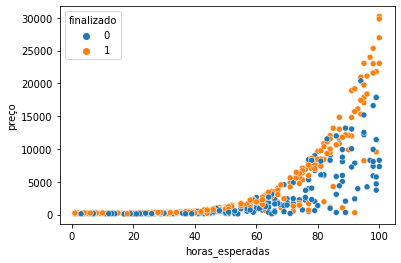

In [130]:
# Analisando cada uma das classificações

sns.scatterplot(x = "horas_esperadas", y = "preço", hue = teste_y, data = teste_x)

In [131]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preço.min()
y_max = teste_x.preço.max()

print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [132]:
import numpy as np
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [133]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

In [134]:
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [135]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([[1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

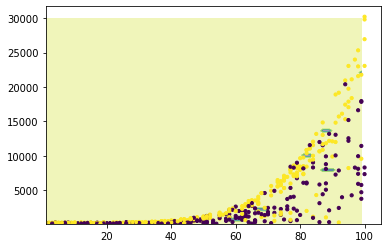

In [136]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preço, c=teste_y, s= 10)

# DECISION BOUNDARY

In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi {acuracia:.2f}%")  

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


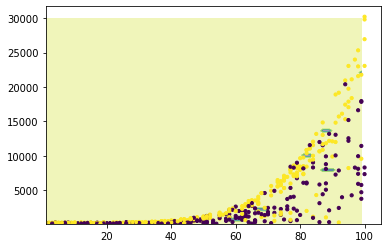

In [138]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preço.min()
y_max = teste_x.preço.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preço, c=teste_y, s= 10)

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi {acuracia:.2f}%") 


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


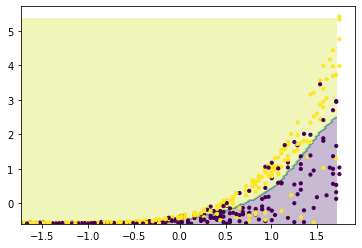

In [140]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c=teste_y, s= 10)

# Algoritmos de machine learning para classificação: Projeto 4

In [141]:
!pip install graphviz==0.10
!apt-get install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [142]:
import pandas as pd
# Site de vendas de carros
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [143]:
# Renomeando as colunas
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preço',
    'sold' : 'vendido'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preço,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [144]:
# Quando falamnos de uma classificação binária é melhor usar 0 ou 1, mudar a class vendido
a_trocar = {
    'no' : 0,
    'yes' : 1
}
dados.vendido = dados.vendido.map(a_trocar)

In [145]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preço,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [146]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preço,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [147]:
# transformando de milhas/ano para km/ano
dados['km_por_ano'] = dados.milhas_por_ano * 1.690934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preço,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,36864.052134
1,1,7843,1998,40557.96,1,24,13261.995362
2,2,7109,2006,89627.50,0,16,12020.849806
3,3,26823,2015,95276.14,0,7,45355.922682
4,4,7935,2014,117384.68,1,8,13417.561290


In [148]:
# Tirando colunas desnecessárias
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preço,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,36864.052134
1,40557.96,1,24,13261.995362
2,89627.50,0,16,12020.849806
3,95276.14,0,7,45355.922682
4,117384.68,1,8,13417.561290


In [149]:
#Classificando
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preço", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 58.00%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [150]:
# Comparação para saber se o resultado é bom. baseline
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy stratified foi de {acuracia:.2f}%")

A acurácia do dummy stratified foi de 58.00%


In [151]:
# Comparação para saber se o resultado é bom. baseline
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print(f"A acurácia do dummy stratified foi de {acuracia:.2f}%")

A acurácia do dummy stratified foi de 58.00%


In [152]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print(f"A acurácia do dummy mostfrequent foi de {acuracia:.2f}%")

A acurácia do dummy mostfrequent foi de 58.00%


In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


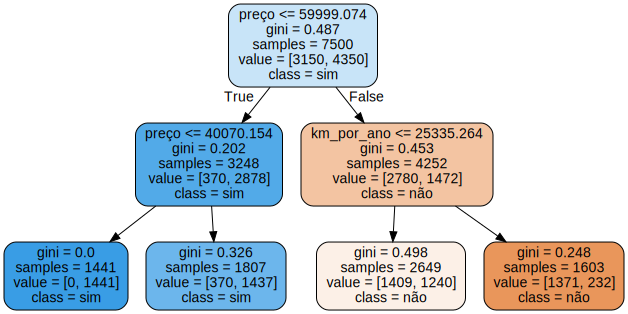

In [155]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns

dot_data = export_graphviz(modelo, out_file=None, 
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names= ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico